In [ ]:
!nvidia-smi

Mon Apr  8 09:21:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import torch
import torchvision
from torchvision.transforms import transforms

In [ ]:
transform_augmented = transforms.Compose([
            transforms.RandomHorizontalFlip(p=1),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.1,0.1,0.1])
])

transform_original = transforms.Compose([
            transforms.ToTensor()
])


In [ ]:
training_data_original=torchvision.datasets.CIFAR10(root='/content/data', train=True, download=True, transform=transform_original)
training_data_aug=torchvision.datasets.CIFAR10(root='/content/data', train=True, download=True, transform=transform_augmented)

training_data=torch.utils.data.ConcatDataset([training_data_original,training_data_aug])
testing_data=torchvision.datasets.CIFAR10(root='/content/data', train=False, download=True, transform=transform_original)

100%|██████████| 170498071/170498071 [00:06<00:00, 27822444.70it/s]


Extracting /content/data/cifar-10-python.tar.gz to /content/data
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
len(training_data)

100000

In [ ]:

classes={0:"plane",1:"car",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [ ]:

training_data[0][0].shape

torch.Size([3, 32, 32])

# creating dataloader

In [ ]:
train_loader=torch.utils.data.DataLoader(training_data, batch_size=32,shuffle=True)
test_loader=torch.utils.data.DataLoader(testing_data, batch_size=32,shuffle=True)

# plotting some sample image

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

sample_data=iter(train_loader)
images, labels =next(sample_data)

In [ ]:
labels

tensor([0, 1, 7, 5, 9, 7, 3, 9, 1, 2, 2, 0, 2, 9, 0, 8, 7, 0, 9, 7, 8, 2, 5, 9,
        7, 4, 1, 5, 7, 9, 5, 6])

In [ ]:
def imshow(img):
  img_arr= img.numpy()
  plt.imshow(np.transpose(img_arr,(1,2,0)))
  plt.show()

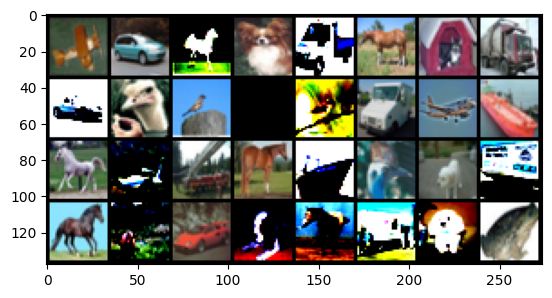

In [ ]:
imshow(torchvision.utils.make_grid(images))

# Convolutional Neural Network

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class MyFirstCNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=1, padding=1)
    self.conv2=nn.Conv2d(in_channels=6, out_channels=8, kernel_size=5, stride=1, padding=1)
    self.conv3=nn.Conv2d(in_channels=8, out_channels=10, kernel_size=3, stride=1, padding=1)
    self.conv4=nn.Conv2d(in_channels=10, out_channels=12, kernel_size=5, stride=1, padding=0)

    self.dropout=nn.Dropout(0.2)

    self.fc1=nn.Linear(12*26*26, 1000)
    self.fc2=nn.Linear(1000, 500)
    self.fc3=nn.Linear(500, 50)
    self.fc4=nn.Linear(50, 10)

  def forward(self,x):
    x=F.relu(self.conv1(x))
    x=F.relu(self.conv2(x))
    x=F.relu(self.conv3(x))
    x=F.relu(self.conv4(x))
    x=torch.flatten(x,1)
    x=self.dropout(x)
    x=F.relu(self.fc1(x))
    x=self.dropout(x)
    x=F.relu(self.fc2(x))
    x=self.dropout(x)
    x=F.relu(self.fc3(x))
    x=self.dropout(x)
    x=self.fc4(x)
    return x

In [ ]:
model=MyFirstCNN()

In [ ]:
model=model.to('cuda')

In [ ]:
print(model)

MyFirstCNN(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(6, 8, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(8, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(10, 12, kernel_size=(5, 5), stride=(1, 1))
  (dropout): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=8112, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=10, bias=True)
)


In [ ]:
import torch.optim as optim

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.009)

# Training Process

In [ ]:
model.train()

MyFirstCNN(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(6, 8, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(8, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(10, 12, kernel_size=(5, 5), stride=(1, 1))
  (dropout): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=8112, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=10, bias=True)
)

In [ ]:
for epoch in range(0,10):
  total_loss=0
  for images,labels in train_loader:
    images=images.to('cuda')
    labels=labels.to('cuda')
    optimizer.zero_grad()
    output=model(images)
    loss=criterion(output, labels)
    loss.backward()
    optimizer.step()
    total_loss=total_loss+loss.item()
  print(f"for epoch {epoch} the loss is :{total_loss}")

for epoch 0 the loss is :6485.143755078316
for epoch 1 the loss is :5474.353816628456
for epoch 2 the loss is :4942.67376935482
for epoch 3 the loss is :4491.640425145626
for epoch 4 the loss is :4147.17508995533
for epoch 5 the loss is :3850.149235546589
for epoch 6 the loss is :3574.791539311409
for epoch 7 the loss is :3308.1619669497013
for epoch 8 the loss is :3048.769074112177
for epoch 9 the loss is :2776.2099896371365


# Model evaluation

In [ ]:
correct=0
total=0
model.eval()
with torch.no_grad():
  for images, labels in test_loader:
    images=images.to('cuda')
    labels=labels.to('cuda')
    test_output=model(images)
    predicted=torch.argmax(test_output,dim=1)
    total = total + labels.size(0)
    correct = correct + (predicted == labels).sum().item()

In [ ]:
print(f"the accuracy of the model is {correct/total*100}")

the accuracy of the model is 63.92


# save the model

In [ ]:
torch.save(model.state_dict(),'/content/cnn_model.pth')

# load the model weights

In [ ]:
model1=MyFirstCNN()
model1.load_state_dict(torch.load('/content/cnn_model.pth'))

<All keys matched successfully>

In [ ]:
model1.eval()

MyFirstCNN(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(6, 8, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(8, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(10, 12, kernel_size=(5, 5), stride=(1, 1))
  (dropout): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=8112, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=10, bias=True)
)